In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Dataset loaded successfully!
Sentiment prediction complete.

Prediction vs. Manual Comparison (First 10 Rows):
╒═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════╤════════════════════╕
│ response                                                                                                                                                                                                                                                │ Predicted_Sentiment   │ Actual_Sentiment   │
╞═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════════════╪════════════════════

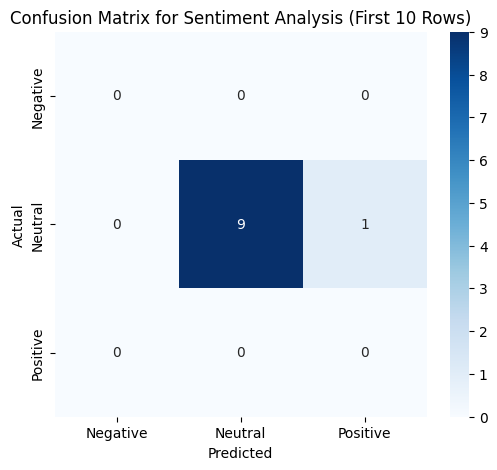

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

try:
    nltk.download('stopwords', quiet=True)
except:
    pass

file_path = "//content//human_chat_new.csv"
df = pd.DataFrame() # Initialize df

try:
    df = pd.read_csv(file_path, sep='\t', header=None, engine='python')
    if 0 in df.columns:
        df.rename(columns={0: 'response'}, inplace=True)
        df = df[['response']].copy()
    else:
        df = pd.read_csv(file_path, header=None, engine='python', sep=None)
        df.rename(columns={0: 'response'}, inplace=True)
        df = df[['response']].copy()
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Could not load dataset. Details: {e}")
    df = pd.DataFrame({'response': []})


positive_words = {
    "good", "great", "happy", "love", "excellent", "amazing", "awesome",
    "fantastic", "positive", "wonderful", "pleased", "joy", "smile", "best",
    "like", "better", "nice", "delight", "cheerful", "brilliant"
}

negative_words = {
    "bad", "sad", "hate", "angry", "terrible", "awful", "worst",
    "horrible", "negative", "pain", "upset", "disappoint", "ugly",
    "annoyed", "hurt", "cry", "poor", "sucks", "fail", "boring"
}

def analyze_sentiment_manual(text):
    if pd.isna(text) or text is None:
        return "Neutral"

    text = str(text).lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))

    filtered_tokens = []
    for word in tokens:
        cleaned_word = re.sub(r'[^a-z0-9]', '', word)
        if cleaned_word and cleaned_word not in stop_words:
            filtered_tokens.append(cleaned_word)

    pos_count = sum(1 for word in filtered_tokens if word in positive_words)
    neg_count = sum(1 for word in filtered_tokens if word in negative_words)

    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"


if not df.empty:
    df['Predicted_Sentiment'] = df['response'].apply(analyze_sentiment_manual)
    print("Sentiment prediction complete.")

if 'Predicted_Sentiment' in df.columns and len(df) >= 10:
    comparison_df = df.head(10).copy()

    manual_labels = [
        "Neutral", "Neutral", "Neutral", "Neutral", "Neutral",
        "Neutral", "Neutral", "Neutral", "Neutral", "Neutral"
    ]

    comparison_df['Actual_Sentiment'] = manual_labels

    print("\nPrediction vs. Manual Comparison (First 10 Rows):")
    result_table = comparison_df[['response', 'Predicted_Sentiment', 'Actual_Sentiment']]
    print(tabulate(result_table, headers="keys", tablefmt="fancy_grid", showindex=False))


    print("\nEvaluation Results (Focus on First 10 Rows):")

    y_true = comparison_df['Actual_Sentiment']
    y_pred = comparison_df['Predicted_Sentiment']
    target_names = ['Negative', 'Neutral', 'Positive']

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"Accuracy : **{accuracy:.2f}**")

    print("\nDetailed Classification Report:")
    report = classification_report(y_true, y_pred, labels=target_names, zero_division=0)
    print(report)

    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_true, y_pred, labels=target_names)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix for Sentiment Analysis (First 10 Rows)")
    plt.show()

else:
    print("\n error.")